#### Bussiness Problem: Whether the client has subscribed a term deposit or not Binomial ("yes" or "no")

 #dataset: bank-full.csv
 #output-->y 
 #input-->age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,	previous,poutcome

In [1]:
import pandas as pd
import seaborn as sb
from sklearn.linear_model import LogisticRegression

In [2]:
app_log = pd.read_csv("C:\\Users\\Raja\\Downloads\\assignments\\logistic\\bank-full.csv",sep=';')

In [3]:
app_log.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [4]:
app_log.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
# select columns
columns = ['age', 'balance', 'duration', 'campaign', 'y']
app_log_sel = app_log[columns]
app_log_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 5 columns):
age         45211 non-null int64
balance     45211 non-null int64
duration    45211 non-null int64
campaign    45211 non-null int64
y           45211 non-null object
dtypes: int64(4), object(1)
memory usage: 1.7+ MB


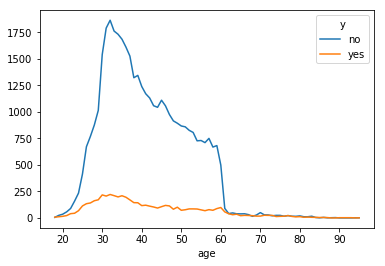

In [6]:
pd.crosstab(app_log_sel.age,app_log_sel.y).plot(kind="line")

#graph shows that age group 20-60 has more rejection of application while 60-90 almost everybody.

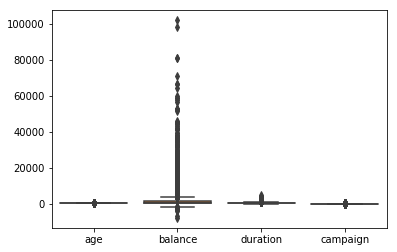

In [7]:
sb.boxplot(data =app_log_sel,orient = "v")

In [8]:
app_log_sel['outcome'] = app_log_sel.y.map({'no':0, 'yes':1})
app_log_sel.tail(10)

C:\Users\Raja\Anaconda33\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,age,balance,duration,campaign,y,outcome
45201,53,583,226,1,yes,1
45202,34,557,224,1,yes,1
45203,23,113,266,1,yes,1
45204,73,2850,300,1,yes,1
45205,25,505,386,2,yes,1
45206,51,825,977,3,yes,1
45207,71,1729,456,2,yes,1
45208,72,5715,1127,5,yes,1
45209,57,668,508,4,no,0
45210,37,2971,361,2,no,0


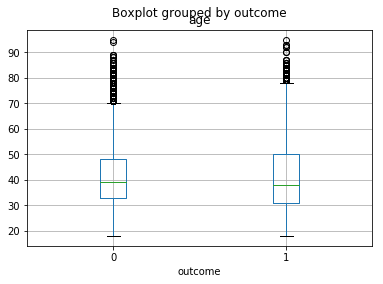

In [9]:
app_log_sel.boxplot(column='age', by='outcome')

#probably not a great feature since lot of outliers

In [10]:
feature_col=['age','balance','duration','campaign']
output_target=['outcome']
X = app_log_sel[feature_col]
Y = app_log_sel[output_target]

In [11]:
classifier = LogisticRegression()

In [12]:
classifier.fit(X,Y)

C:\Users\Raja\Anaconda33\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Raja\Anaconda33\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
classifier.coef_ # coefficients of features 

array([[ 6.87701099e-03,  3.71788075e-05,  3.53683446e-03,
        -1.38686085e-01]])

In [14]:
classifier.predict_proba (X) # Probability values 

array([[0.87488614, 0.12511386],
       [0.92475612, 0.07524388],
       [0.94535532, 0.05464468],
       ...,
       [0.31166095, 0.68833905],
       [0.82477582, 0.17522418],
       [0.86336275, 0.13663725]])

In [15]:
y_pred = classifier.predict(X)

In [16]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
confusion_matrix = confusion_matrix(Y,y_pred)

In [19]:
print (confusion_matrix)

[[39345   577]
 [ 4439   850]]


In [20]:
import matplotlib.pyplot as plt

Text(0.5,15,'Predicted Label')

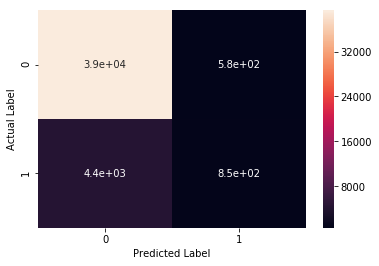

In [21]:
sb.heatmap(confusion_matrix, annot=True)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

====================================================================================================================

#### Bussiness Problem: Classify whether application accepted or not using Logistic regression

 #dataset: creditcard.csv
 #output-->card, 
 #input--reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active

In [22]:
app_acc = pd.read_csv("C:\\Users\\Raja\\Downloads\\assignments\\logistic\\creditcard.csv",sep=',')

In [23]:
app_acc.iloc[10:20,0:]

,Unnamed: 0,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
10,11,yes,0,30.50000,3.9500,0.078025,256.66420,yes,no,1,24,1,20
11,12,no,0,42.00000,1.9800,0.000606,0.00000,yes,no,2,36,1,0
12,13,no,0,30.00000,1.7300,0.000694,0.00000,yes,no,1,42,0,12
13,14,yes,0,28.83333,2.4500,0.038796,78.87417,yes,no,0,26,1,3
14,15,yes,0,35.33333,1.9080,0.026907,42.61500,yes,no,2,120,0,5
15,16,yes,0,41.16667,3.2000,0.125819,335.43500,yes,no,1,168,1,22
16,17,yes,0,40.08333,4.0000,0.074816,248.71920,yes,no,2,96,1,0
17,18,no,7,29.50000,3.0000,0.000400,0.00000,yes,no,2,60,1,8
18,19,yes,0,39.50000,9.9999,0.065795,548.03500,yes,yes,0,28,1,0
19,20,no,3,45.75000,3.4000,0.000353,0.00000,no,no,0,28,1,10


In [24]:
app_acc.drop(['owner','selfemp'], axis=1, inplace=True)
app_acc.iloc[10:20,0:]

,Unnamed: 0,card,reports,age,income,share,expenditure,dependents,months,majorcards,active
10,11,yes,0,30.50000,3.9500,0.078025,256.66420,1,24,1,20
11,12,no,0,42.00000,1.9800,0.000606,0.00000,2,36,1,0
12,13,no,0,30.00000,1.7300,0.000694,0.00000,1,42,0,12
13,14,yes,0,28.83333,2.4500,0.038796,78.87417,0,26,1,3
14,15,yes,0,35.33333,1.9080,0.026907,42.61500,2,120,0,5
15,16,yes,0,41.16667,3.2000,0.125819,335.43500,1,168,1,22
16,17,yes,0,40.08333,4.0000,0.074816,248.71920,2,96,1,0
17,18,no,7,29.50000,3.0000,0.000400,0.00000,2,60,1,8
18,19,yes,0,39.50000,9.9999,0.065795,548.03500,0,28,1,0
19,20,no,3,45.75000,3.4000,0.000353,0.00000,0,28,1,10


In [25]:
#Creating dommy variable outcome for card
app_acc['outcome'] = app_acc.card.map({'no':0, 'yes':1})
app_acc.iloc[10:20,0:]

,Unnamed: 0,card,reports,age,income,share,expenditure,dependents,months,majorcards,active,outcome
10,11,yes,0,30.50000,3.9500,0.078025,256.66420,1,24,1,20,1
11,12,no,0,42.00000,1.9800,0.000606,0.00000,2,36,1,0,0
12,13,no,0,30.00000,1.7300,0.000694,0.00000,1,42,0,12,0
13,14,yes,0,28.83333,2.4500,0.038796,78.87417,0,26,1,3,1
14,15,yes,0,35.33333,1.9080,0.026907,42.61500,2,120,0,5,1
15,16,yes,0,41.16667,3.2000,0.125819,335.43500,1,168,1,22,1
16,17,yes,0,40.08333,4.0000,0.074816,248.71920,2,96,1,0,1
17,18,no,7,29.50000,3.0000,0.000400,0.00000,2,60,1,8,0
18,19,yes,0,39.50000,9.9999,0.065795,548.03500,0,28,1,0,1
19,20,no,3,45.75000,3.4000,0.000353,0.00000,0,28,1,10,0


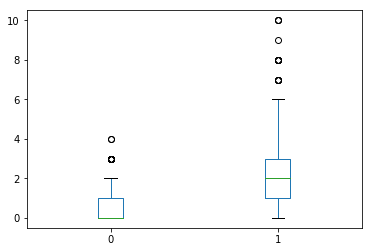

In [26]:
pd.crosstab(app_acc.age,app_acc.outcome).plot(kind="box")

#in both have outliers

In [27]:
feature_cols=['age','income','share','expenditure','dependents','months','majorcards','active']
output_tar=['outcome']
X1 = app_acc[feature_cols]
Y1 = app_acc[output_tar]

In [28]:
model = LogisticRegression()

In [29]:
model.fit(X1,Y1)

C:\Users\Raja\Anaconda33\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Raja\Anaconda33\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
model.coef_ # coefficients of features 

array([[ 3.42372282e-03, -1.64479751e-01, -9.12158217e-04,
         1.69654900e+00, -7.33641219e-01, -2.51555974e-03,
         1.26238105e-01,  5.12737603e-03]])

In [31]:
model.predict_proba (X1) # Probability values 

array([[0.00000000e+00, 1.00000000e+00],
       [3.03048603e-06, 9.99996970e-01],
       [1.58732072e-09, 9.99999998e-01],
       ...,
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00]])

In [33]:
y_pred1= model.predict(X1)
y_pred1


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [38]:
from sklearn.metrics import confusion_matrix


In [39]:
confusion_matrix = confusion_matrix(Y1,y_pred1)

In [40]:
confusion_matrix 

array([[ 296,    0],
       [  23, 1000]], dtype=int64)

Text(0.5,15,'Predicted Label')

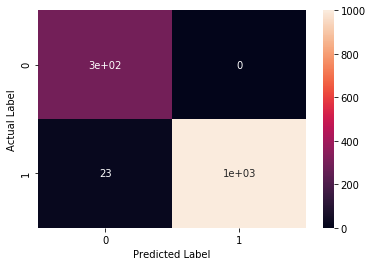

In [41]:
sb.heatmap(confusion_matrix, annot=True)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')